In [ ]:
#ここからtrainとtestへ戻してそれぞれ特徴量生成を行う
df_train = df_all0[df_all0["level_0"] == "train"].drop(columns = ["level_0"])
df_test = df_all0[df_all0["level_0"] == "test"].drop(columns = ["level_0"])

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3489 entries, 0 to 3488
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   id                      3489 non-null   int64   
 1   Age                     3489 non-null   category
 2   TypeofContact           3483 non-null   category
 3   CityTier                3489 non-null   int64   
 4   DurationOfPitch         3489 non-null   category
 5   Occupation              3489 non-null   category
 6   Gender                  3489 non-null   category
 7   NumberOfPersonVisiting  3489 non-null   float64 
 8   NumberOfFollowups       3456 non-null   float64 
 9   ProductPitched          3489 non-null   category
 10  PreferredPropertyStar   3489 non-null   float64 
 11  NumberOfTrips           3489 non-null   category
 12  Passport                3489 non-null   int64   
 13  PitchSatisfactionScore  3489 non-null   int64   
 14  Designation             3489 

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3489 entries, 0 to 3488
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   id                      3489 non-null   int64   
 1   Age                     3489 non-null   category
 2   TypeofContact           3477 non-null   category
 3   CityTier                3489 non-null   int64   
 4   DurationOfPitch         3489 non-null   category
 5   Occupation              3489 non-null   category
 6   Gender                  3489 non-null   category
 7   NumberOfPersonVisiting  3489 non-null   float64 
 8   NumberOfFollowups       3465 non-null   float64 
 9   ProductPitched          3489 non-null   category
 10  PreferredPropertyStar   3489 non-null   float64 
 11  NumberOfTrips           3489 non-null   category
 12  Passport                3489 non-null   int64   
 13  PitchSatisfactionScore  3489 non-null   int64   
 14  Designation             3489 

In [ ]:
# 頻度を計算
type_counts = df_train["TypeofContact"].value_counts()

# 頻度に基づいて値をソート (降順)
sorted_types = type_counts.sort_values(ascending=False).index.tolist()

# sorted_types に nan を追加
sorted_types.append(np.nan)

# OrdinalEncoderを作成 (NaN に -1 を割り当てる)
oe = OrdinalEncoder(categories=[sorted_types], encoded_missing_value=-1, handle_unknown="use_encoded_value", unknown_value=-1)  # handle_unknownとunknown_valueを追加

# df_train に対してエンコード
df_train["TypeofContact_oe"] = oe.fit_transform(df_train[["TypeofContact"]])

# df_test に対してエンコード (fit_transformではなくtransformを使用)
df_test["TypeofContact_oe"] = oe.transform(df_test[["TypeofContact"]])  # transformに変更

In [ ]:
df_train["TypeofContact_oe"].value_counts()

,count
TypeofContact_oe,
0.0,2194
1.0,1289
-1.0,6


In [ ]:
df_test["TypeofContact_oe"].value_counts()

,count
TypeofContact_oe,
0.0,2250
1.0,1227
-1.0,12


In [ ]:
#version２
# df_train に TypeofContact_binary カラムを追加
df_train['TypeofContact_binary'] = df_train['TypeofContact'].map({'Self Enquiry': 0, 'Company Invited': 1}).fillna(0).astype("category")

# df_test に TypeofContact_binary カラムを追加
df_test['TypeofContact_binary'] = df_test['TypeofContact'].map({'Self Enquiry': 0, 'Company Invited': 1}).fillna(0).astype("category")

In [ ]:
df_train['TypeofContact_binary'].value_counts()

,count
TypeofContact_binary,
0,2200
1,1289


In [ ]:
df_test['TypeofContact_binary'].value_counts()

,count
TypeofContact_binary,
0,2262
1,1227


In [ ]:
#頻度を計算
occupation_counts = df_train["Occupation"].value_counts()

# 頻度に基づいて値をソート (降順)
sorted_occupations = occupation_counts.sort_values(ascending=False).index.tolist()

# OrdinalEncoderを作成
# handle_unknownとunknown_valueを追加
oe = OrdinalEncoder(categories=[sorted_occupations], handle_unknown="use_encoded_value", unknown_value=-1)

# df_train に対してエンコード
df_train["Occupation_oe"] = oe.fit_transform(df_train[["Occupation"]])

# df_test に対してエンコード
df_test["Occupation_oe"] = oe.transform(df_test[["Occupation"]])

In [ ]:
df_train["Occupation_oe"].value_counts()

,count
Occupation_oe,
0.0,1727
1.0,1401
2.0,361


In [ ]:
df_test["Occupation_oe"].value_counts()

,count
Occupation_oe,
0.0,1729
1.0,1400
2.0,360


In [ ]:
# df_train に対してワンホットエンコーディング
gender_encoded_train = pd.get_dummies(df_train["Gender_enc"], prefix="Gender", dtype=int)
df_train = pd.concat([df_train, gender_encoded_train], axis=1)

# df_test に対してワンホットエンコーディング
gender_encoded_test = pd.get_dummies(df_test["Gender_enc"], prefix="Gender", dtype=int)
df_test = pd.concat([df_test, gender_encoded_test], axis=1)

In [ ]:
#100以上の外れ値を最大値補完
df_train['NumberOfFollowups_max'] = df_train['NumberOfFollowups'].apply(lambda x: x / 100 if x >= 100 else x)

# df_test に NumberOfFollowups_max カラムを追加
df_test['NumberOfFollowups_max'] = df_test['NumberOfFollowups'].apply(lambda x: x / 100 if x >= 100 else x)

In [ ]:
df_train['NumberOfFollowups_max'].value_counts()

,count
NumberOfFollowups_max,
4.0,1411
3.0,1296
5.0,524
2.0,108
1.0,78
6.0,39


In [ ]:
df_test['NumberOfFollowups_max'].isnull().sum()

24

In [ ]:
#nanを活かす方向でも残しておく
# df_train に NumberOfFollowups_nan-1 カラムを追加
df_train['NumberOfFollowups_nan-1'] = pd.to_numeric(df_train['NumberOfFollowups_max'], errors='coerce').fillna(-1).astype(int)
df_train.loc[df_train['NumberOfFollowups'].isin(['0', 0]), 'NumberOfFollowups_nan-1'] = -1

# df_test に NumberOfFollowups_nan-1 カラムを追加
df_test['NumberOfFollowups_nan-1'] = pd.to_numeric(df_test['NumberOfFollowups_max'], errors='coerce').fillna(-1).astype(int)
df_test.loc[df_test['NumberOfFollowups'].isin(['0', 0]), 'NumberOfFollowups_nan-1'] = -1

In [ ]:
df_train["NumberOfFollowups_nan-1"].value_counts()

,count
NumberOfFollowups_nan-1,
4,1411
3,1296
5,524
2,108
1,78
6,39
-1,33


(array([   0.,   78., 1404., 1974.]),
 array([0., 1., 2., 4., 6.]),
 <BarContainer object of 4 artists>)

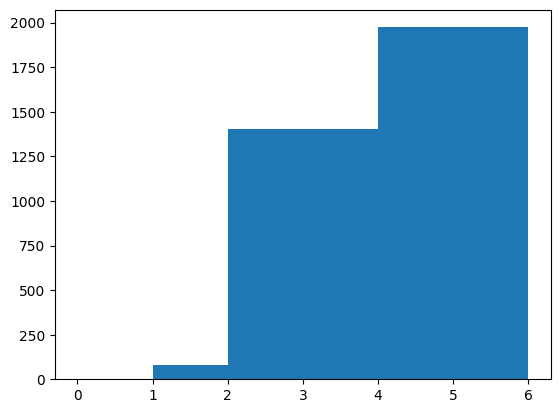

In [ ]:
plt.hist(df_train["NumberOfFollowups_nan-1"], bins=[0, 1, 2,4,6])

In [ ]:
#最頻値を取得
most_frequent_value = df_train['NumberOfFollowups_max'].mode()[0]

# df_train に適用 (NaN 値と 0 を同時に置換)
df_train['NumberOfFollowups_max'] = df_train['NumberOfFollowups_max'].replace({0: most_frequent_value, np.nan: most_frequent_value})

# df_test にも同様の処理を適用
df_test['NumberOfFollowups_max'] = df_test['NumberOfFollowups_max'].replace({0: most_frequent_value, np.nan: most_frequent_value})

In [ ]:
print(df_train['NumberOfFollowups_max'].isnull().sum())  # NaN 値の数を表示
print(df_train['NumberOfFollowups_max'].value_counts())  # 各値の出現回数を表示


0
NumberOfFollowups_max
4.0    1444
3.0    1296
5.0     524
2.0     108
1.0      78
6.0      39
Name: count, dtype: int64


In [ ]:
#各意味合いに沿ってrank化
rank_dict = {
    'king': 5,
    'superdeluxe': 4,
    'deluxe': 3,
    'standard': 2,
    'basic': 1
}


df_train['ProductPitched_Score'] = df_train['ProductPitched_low'].map(rank_dict)

# df_test にも ProductPitched_Score カラムを追加
df_test['ProductPitched_Score'] = df_test['ProductPitched_low'].map(rank_dict)

In [ ]:
df_train["ProductPitched_Score"] = df_train["ProductPitched_Score"].astype(int)
df_test["ProductPitched_Score"] = df_test["ProductPitched_Score"].astype(int)

In [ ]:
#欠損値として扱う特徴量としておく
df_train["NumberOfTrips_year-1"] = df_train["NumberOfTrips_year"].replace(0, -1)

df_test["NumberOfTrips_year-1"] = df_test["NumberOfTrips_year"].replace(0, -1)

df_train["NumberOfTrips_year-1"].value_counts()

,count
NumberOfTrips_year-1,
2,1164
3,820
5,515
1,409
7,256
4,163
6,130
-1,22
8,10


In [ ]:
#スコア化した良い商品*満足度のスコア
#→売り込み商品が良くて満足度が高ければ成約率も高いはず
df_train["Product_Score"] = df_train["ProductPitched_Score"]*df_train["PitchSatisfactionScore"]

df_test["Product_Score"] = df_test["ProductPitched_Score"]*df_test["PitchSatisfactionScore"]

df_train["Product_Score"].value_counts()

,count
Product_Score,
4,684
2,652
6,559
3,449
12,311
8,241
9,185
1,157
10,52


In [ ]:
df_test["Product_Score"].value_counts()

,count
Product_Score,
2,653
4,623
6,547
3,446
12,309
8,219
1,204
9,174
10,79


In [ ]:
#スコア化した良い商品*顧客によるホテル施設の優先評価
#→良い商品であり、施設の評価も高ければ成約率が高くなりそう
df_train["Product_Property_Score"] = df_train["ProductPitched_Score"] * df_train["PreferredPropertyStar"]

# df_test に Product_Property_Score カラムを追加
df_test["Product_Property_Score"] = df_test["ProductPitched_Score"] * df_test["PreferredPropertyStar"]

In [ ]:
# 頻度を計算
product_counts = df_train["Designation_low"].value_counts()  # df_train に変更

# 頻度に基づいて値をソート
sorted_products = product_counts.index.tolist()

# ラベルエンコーダーを作成
le = LabelEncoder()

# 頻度に基づいてラベルをエンコード (df_train で fit)
le.fit(df_train["Designation_low"])  # df_train["Designation_low"] で fit

# df_train に Designation_le カラムを追加
df_train["Designation_le"] = le.transform(df_train["Designation_low"])

# df_test に Designation_le カラムを追加 (df_train で fit した le を使用)
df_test["Designation_le"] = le.transform(df_test["Designation_low"])

In [ ]:
df_train["Designation_le"].value_counts()

,count
Designation_le,
0,1150
1,1055
2,854
3,430


In [ ]:
#rank化して使用する特徴量として作成
rank_dict = {
    'vip': 4,
    'executive': 3,
    'seniormanager': 2,
    'manager': 1
}

# df_train に Designation_rank カラムを追加
df_train["Designation_rank"] = df_train["Designation_low"].map(rank_dict)

# df_test に Designation_rank カラムを追加
df_test["Designation_rank"] = df_test["Designation_low"].map(rank_dict)

In [ ]:
df_train["Designation_rank"].value_counts()

,count
Designation_rank,
3,1150
1,1055
2,854
4,430


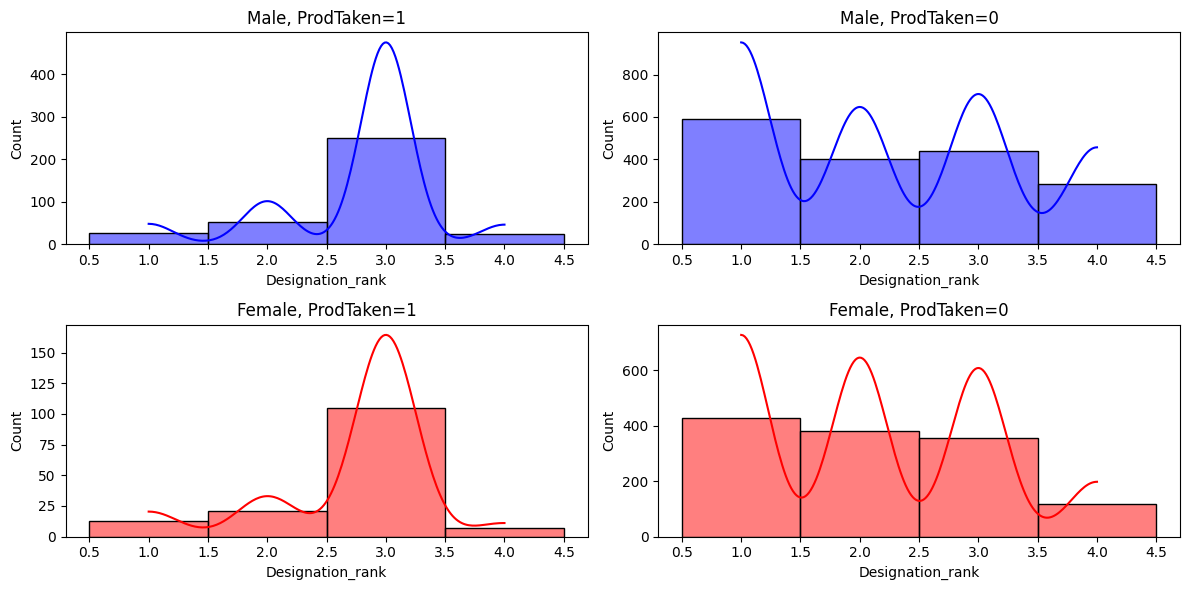

In [ ]:
# Gender_encとProdTakenでデータを分割
#特徴量を変えて視覚化
male_prodtaken_data = df_train[(df_train['Gender_enc'] == 1) & (df_train['ProdTaken'] == 1)]['Designation_rank']
male_notprodtaken_data = df_train[(df_train['Gender_enc'] == 1) & (df_train['ProdTaken'] == 0)]['Designation_rank']
female_prodtaken_data = df_train[(df_train['Gender_enc'] == 0) & (df_train['ProdTaken'] == 1)]['Designation_rank']
female_notprodtaken_data = df_train[(df_train['Gender_enc'] == 0) & (df_train['ProdTaken'] == 0)]['Designation_rank']

# 全データのDesignation_rankの最小値と最大値を取得
min_rank = df_train['Designation_rank'].astype(int).min()
max_rank = df_train['Designation_rank'].astype(int).max()

# binのエッジを指定 (例: 最小値から最大値までを1刻み)
bins = np.arange(min_rank, max_rank + 2, 1)  # +2は最大値を含めるため

# ヒストグラムを作成
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.histplot(male_prodtaken_data, color='blue', kde=True, bins=bins)  # bins引数を指定
plt.title('Male, ProdTaken=1')

plt.subplot(2, 2, 2)
sns.histplot(male_notprodtaken_data, color='blue', kde=True, bins=bins)  # bins引数を指定
plt.title('Male, ProdTaken=0')

plt.subplot(2, 2, 3)
sns.histplot(female_prodtaken_data, color='red', kde=True, bins=bins)  # bins引数を指定
plt.title('Female, ProdTaken=1')

plt.subplot(2, 2, 4)
sns.histplot(female_notprodtaken_data, color='red', kde=True, bins=bins)  # bins引数を指定
plt.title('Female, ProdTaken=0')
plt.tight_layout()
plt.show()

In [ ]:
# 欠損値として扱う
df_train["MonthlyIncome_ext-1"] = pd.to_numeric(df_train["MonthlyIncome_ext"], errors='coerce').fillna(-1).astype(int)

# df_test に MonthlyIncome_ext-1 カラムを追加
df_test["MonthlyIncome_ext-1"] = pd.to_numeric(df_test["MonthlyIncome_ext"], errors='coerce').fillna(-1).astype(int)

In [ ]:
#0 を含む欠損値を中央値で補完した特徴量も作成
median_income_train = df_train["MonthlyIncome_ext"].median()


df_train["MonthlyIncome_0_med"] = df_train["MonthlyIncome_ext"].copy()
df_train.loc[df_train["MonthlyIncome_0_med"] == 0, "MonthlyIncome_0_med"] = np.nan
df_train["MonthlyIncome_0_med"] = df_train["MonthlyIncome_0_med"].fillna(median_income_train)

# df_test にも同様の処理を適用
df_test["MonthlyIncome_0_med"] = df_test["MonthlyIncome_ext"].copy()
df_test.loc[df_test["MonthlyIncome_0_med"] == 0, "MonthlyIncome_0_med"] = np.nan
df_test["MonthlyIncome_0_med"] = df_test["MonthlyIncome_0_med"].fillna(median_income_train)

# 確認
print(df_train["MonthlyIncome_0_med"].isnull().sum())

0


In [ ]:
# MonthlyIncome_0_med を更新 (百の位を四捨五入)
df_train["MonthlyIncome_0_med"] = (df_train["MonthlyIncome_0_med"] / 1000).round() * 1000

df_test["MonthlyIncome_0_med"] = (df_test["MonthlyIncome_0_med"] / 1000).round() * 1000

In [ ]:
df_train["MonthlyIncome_0_med"].isnull().sum()

0

In [ ]:
# 離婚はしているが一人暮らしでない可能性もあるため、数値割り振りを変えたもの
def convert_material_info2(value):
  if value in ["結婚済み"]:
    return 3
  elif value in ["離婚済み"]:
    return 2
  elif value in ["独身", "未婚"]:
    return 1
  else:
    return value

# df_trainに適用
df_train['material_count2'] = df_train['material_status'].copy()
df_train["material_score"] = df_train["material_count2"].apply(convert_material_info2)

# df_testに適用
df_test['material_count2'] = df_test['material_status'].copy()
df_test["material_score"] = df_test["material_count2"].apply(convert_material_info2)

In [ ]:
#後々カテゴリ扱いとする
df_train["material_score"].value_counts()

,count
material_score,
3,1384
1,1227
2,878


In [ ]:
#df_all["material_count"]の結婚済みは２、それ以外は１とする。コピーなり一時的に違う変数に代入するなり。
#足算してdf_all["family"] へ代入し家族構成を表す特徴量とする。

# df_trainへの適用
df_train["material_temp"] =  np.where(df_train["material_count"] == 0, 1, df_train["material_count"])
df_train["child_temp"] = df_train["child_info_int"]
df_train["family"] = df_train["material_temp"] + df_train["child_temp"]
df_train["family"] = df_train["family"].astype(int)
df_train = df_train.drop(["material_temp", "child_temp"], axis=1)

# df_testへの適用
df_test["material_temp"] = np.where(df_test["material_count"] == 0, 1, df_test["material_count"])
df_test["child_temp"] = df_test["child_info_int"]
df_test["family"] = df_test["material_temp"] + df_test["child_temp"]
df_test["family"] = df_test["family"].astype(int)
df_test = df_test.drop(["material_temp", "child_temp"], axis=1)

# 既婚 + 子供有無
# 未婚・離婚 + 子供有無

In [ ]:
df_train["family"].value_counts()

,count
family,
2,1235
3,1139
1,690
4,392
5,33


In [ ]:
# NumberOfPersonVisiting と family の組み合わせごとの人数をカウント
#旅行同行者と家族構成の割合

# 集約テーブルの作成 (df_trainまたはdf_testを使用)
df_fam = pd.crosstab(df_train["NumberOfPersonVisiting"], df_train["family"], normalize="index")  # df_trainを使用
df_fam = df_fam.reset_index()
df_fam = pd.melt(df_fam, id_vars="NumberOfPersonVisiting", value_name="family_travel_share")

# df_trainへの適用
df_train = pd.merge(df_train, df_fam, on=["NumberOfPersonVisiting", "family"], how="left")

# df_testへの適用
df_test = pd.merge(df_test, df_fam, on=["NumberOfPersonVisiting", "family"], how="left")

# 全体の要素数で割って比率を計算.%が多いほど子供を連れていく可能性が高い
#意外と一人旅の割合高い可能性

In [ ]:
df_test["family_travel_share"].value_counts()

,count
family_travel_share,
0.501866,780
0.481481,660
0.268035,466
0.246187,380
0.230100,309
0.209877,279
0.693452,231
0.306548,119
0.062455,77


In [ ]:
df_train["family"].value_counts()

,count
family,
2,1235
3,1139
1,690
4,392
5,33


In [ ]:
df_train["NumberOfPersonVisiting"].value_counts()

,count
NumberOfPersonVisiting,
2.0,1608
3.0,1377
1.0,336
4.0,168


In [ ]:
#旅行計画に数えられている人数/世帯人数
df_train["Travel_fam_New"] = df_train["NumberOfPersonVisiting"] / df_train["family"]

# df_testへの適用
df_test["Travel_fam_New"] = df_test["NumberOfPersonVisiting"] / df_test["family"]

In [ ]:
df_train["Travel_fam_New"].value_counts()

,count
Travel_fam_New,
1.0,1756
0.666667,431
2.0,406
0.75,339
1.5,289
0.5,103
3.0,86
1.333333,45
0.8,33


In [ ]:
df_train["Travel_fam_New"] = df_train["Travel_fam_New"].astype(int)
df_test["Travel_fam_New"] = df_test["Travel_fam_New"].astype(int)

In [ ]:
# 月収帯を定義 (5万円刻み) - df_trainの最大値を使用
income_bins = np.arange(0, df_train['MonthlyIncome_0_med'].max() + 50000, 50000)

# df_trainへの適用
df_train['MonthlyIncome_binned'] = pd.cut(
    df_train['MonthlyIncome_0_med'],
    bins=income_bins,
    labels=False,
    include_lowest=True,
    duplicates='drop'
).astype(int)

# df_testへの適用
df_test['MonthlyIncome_binned'] = pd.cut(
    df_test['MonthlyIncome_0_med'],
    bins=income_bins,  # df_trainで計算したincome_binsを使用
    labels=False,
    include_lowest=True,
    duplicates='drop'
).astype(int)


print(df_train[['MonthlyIncome_0_med', 'MonthlyIncome_binned']].head())
print(df_test[['MonthlyIncome_0_med', 'MonthlyIncome_binned']].head())

   MonthlyIncome_0_med  MonthlyIncome_binned
0             254000.0                     5
1             404000.0                     8
2             278000.0                     5
3             327000.0                     6
4             258000.0                     5
   MonthlyIncome_0_med  MonthlyIncome_binned
0             497000.0                     9
1             300000.0                     5
2             260000.0                     5
3             260000.0                     5
4             269000.0                     5


In [ ]:
df_train['MonthlyIncome_binned'].isnull().sum()

0

In [ ]:
# 中央値を計算し0 を含む欠損値を中央値で補完
median_income_train = df_train["Age_numeric"].median()


df_train["Age_numeric_0_med"] = df_train["Age_numeric"].copy()
df_train.loc[df_train["Age_numeric_0_med"] == 0, "Age_numeric_0_med"] = np.nan
df_train["Age_numeric_0_med"] = df_train["Age_numeric_0_med"].fillna(median_income_train)

# df_test にも同様の処理を適用
df_test["Age_numeric_0_med"] = df_test["Age_numeric"].copy()
df_test.loc[df_test["Age_numeric_0_med"] == 0, "Age_numeric_0_med"] = np.nan
df_test["Age_numeric_0_med"] = df_test["Age_numeric_0_med"].fillna(median_income_train)

# 確認
print(df_train["Age_numeric_0_med"].isnull().sum())

0


In [ ]:
# 年齢を定義 (５歳刻み)
age_bins = np.arange(0, df_train['Age_numeric_0_med'].max() + 5, 5)

# df_trainへの適用
df_train['Age_numeric_binned'] = pd.cut(
    df_train['Age_numeric_0_med'],
    bins=age_bins,
    labels=False,
    include_lowest=True,
    duplicates='drop'
).astype(int)

# df_testへの適用
df_test['Age_numeric_binned'] = pd.cut(
    df_test['Age_numeric_0_med'],
    bins=age_bins,
    labels=False,
    include_lowest=True,
    duplicates='drop'
).astype(int)


print(df_train[['Age_numeric_0_med', 'Age_numeric_binned']].head())
print(df_test[['Age_numeric_0_med', 'Age_numeric_binned']].head())

   Age_numeric_0_med  Age_numeric_binned
0               48.0                   9
1               30.0                   5
2               25.0                   4
3               21.0                   4
4               41.0                   8
   Age_numeric_0_med  Age_numeric_binned
0               48.0                   9
1               30.0                   5
2               25.0                   4
3               21.0                   4
4               41.0                   8


In [ ]:
df_train['Age_numeric_binned'].describe()

,Age_numeric_binned
count,3489.000000
mean,7.102608
std,1.996360
min,3.000000
25%,6.000000
50%,7.000000
75%,9.000000
max,11.000000


In [ ]:
df_train["Pitch_minutes"].isnull().sum()

121

In [ ]:
# MonthlyIncome_0_med カラムを追加 (0 を含む欠損値を中央値で補完)
df_train["Pitch_minutes_0_med"] = df_train["Pitch_minutes"].copy()  # 元の特徴量をコピー
df_train.loc[df_train["Pitch_minutes_0_med"] == 0, "Pitch_minutes_0_med"] = np.nan
df_train["Pitch_minutes_0_med"] = df_train["Pitch_minutes_0_med"].fillna(median_income_train)

# df_test にも同様の処理を適用
df_test["Pitch_minutes_0_med"] = df_test["Pitch_minutes"].copy()
df_test.loc[df_test["Pitch_minutes_0_med"] == 0, "Pitch_minutes_0_med"] = np.nan
df_test["Pitch_minutes_0_med"] = df_test["Pitch_minutes_0_med"].fillna(median_income_train)

In [ ]:
df_train["Pitch_minutes_0_med"] = df_train["Pitch_minutes_0_med"].astype(int)
df_test["Pitch_minutes_0_med"] = df_test["Pitch_minutes_0_med"].astype(int)

In [ ]:
df_train["Pitch_minutes_0_med"].value_counts()

,count
Pitch_minutes_0_med,
8,338
9,327
15,284
14,266
16,259
7,239
10,231
13,203
11,160


In [ ]:
#売り込みにかけた時間とフォロー回数をかけて、営業度合いを算出
df_train["time_of_follow_new"] = df_train["NumberOfFollowups_max"] * df_train["Pitch_minutes_0_med"].astype(int)
df_test["time_of_follow_new"] = df_test["NumberOfFollowups_max"] * df_test["Pitch_minutes_0_med"].astype(int)

<Axes: >

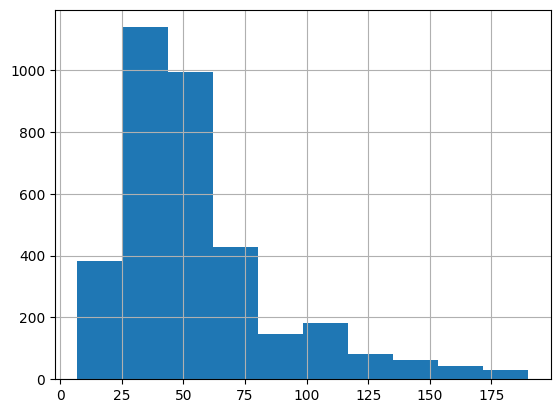

In [ ]:
df_train["time_of_follow_new"].hist()

In [ ]:
# 年収の特徴量作成
df_train['AnnualIncome'] = df_train['MonthlyIncome_0_med'] * 12
df_train['AnnualIncome_rounded'] = (df_train['AnnualIncome'] / 10000).round().astype(int)

# df_testへの適用
df_test['AnnualIncome'] = df_test['MonthlyIncome_0_med'] * 12
df_test['AnnualIncome_rounded'] = (df_test['AnnualIncome'] / 10000).round().astype(int)


print(df_train[['MonthlyIncome_0_med', 'AnnualIncome', 'AnnualIncome_rounded']].head())
print(df_test[['MonthlyIncome_0_med', 'AnnualIncome', 'AnnualIncome_rounded']].head())

   MonthlyIncome_0_med  AnnualIncome  AnnualIncome_rounded
0             254000.0     3048000.0                   305
1             404000.0     4848000.0                   485
2             278000.0     3336000.0                   334
3             327000.0     3924000.0                   392
4             258000.0     3096000.0                   310
   MonthlyIncome_0_med  AnnualIncome  AnnualIncome_rounded
0             497000.0     5964000.0                   596
1             300000.0     3600000.0                   360
2             260000.0     3120000.0                   312
3             260000.0     3120000.0                   312
4             269000.0     3228000.0                   323


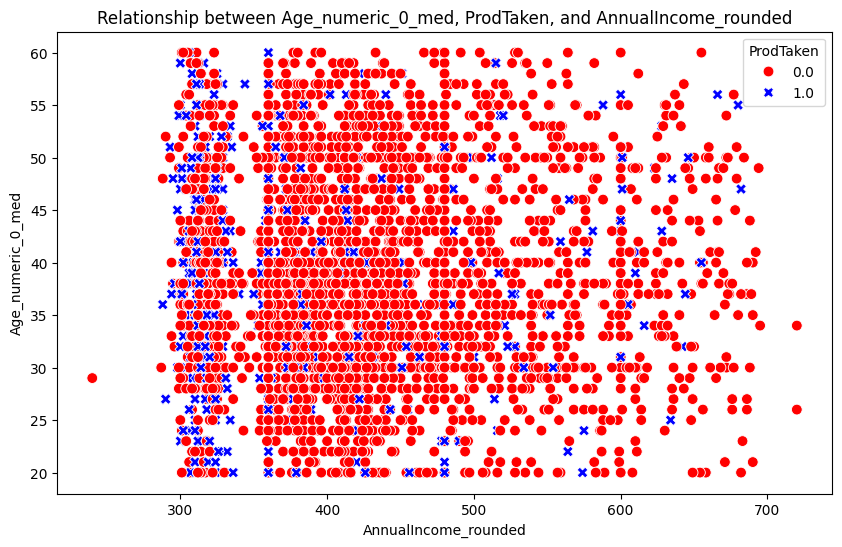

In [ ]:
# 散布図を作成:年収300万円台に正例が多い
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AnnualIncome_rounded', y='Age_numeric_0_med', hue='ProdTaken', style='ProdTaken', data=df_train, palette=['red', 'blue'], s=60)
plt.title('Relationship between Age_numeric_0_med, ProdTaken, and AnnualIncome_rounded')
plt.xlabel('AnnualIncome_rounded')
plt.ylabel('Age_numeric_0_med')
plt.legend(title='ProdTaken')
plt.show()

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3489 entries, 0 to 3488
Data columns (total 63 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   id                       3489 non-null   int64   
 1   Age                      3489 non-null   category
 2   TypeofContact            3483 non-null   category
 3   CityTier                 3489 non-null   int64   
 4   DurationOfPitch          3489 non-null   category
 5   Occupation               3489 non-null   category
 6   Gender                   3489 non-null   category
 7   NumberOfPersonVisiting   3489 non-null   float64 
 8   NumberOfFollowups        3456 non-null   float64 
 9   ProductPitched           3489 non-null   category
 10  PreferredPropertyStar    3489 non-null   float64 
 11  NumberOfTrips            3489 non-null   category
 12  Passport                 3489 non-null   int64   
 13  PitchSatisfactionScore   3489 non-null   int64   
 14  Designat

In [ ]:
df_train["family"].isna().sum()

0

In [ ]:
# df_trainへの適用
df_train["MonthlyInc_fam"] = (df_train["MonthlyIncome_0_med"] / df_train["family"]).astype('int64')
df_train["AnnualInc_fam_round"] = (df_train["AnnualIncome_rounded"] / df_train["family"]).astype('int64')

# df_testへの適用
df_test["MonthlyInc_fam"] = (df_test["MonthlyIncome_0_med"] / df_test["family"]).astype('int64')
df_test["AnnualInc_fam_round"] = (df_test["AnnualIncome_rounded"] / df_test["family"]).astype('int64')

#
display(df_train[["MonthlyInc_fam", "AnnualInc_fam_round", "family"]].sample(n=10))

,MonthlyInc_fam,AnnualInc_fam_round,family
2891,113666,136,3
1150,325000,390,1
2380,185333,222,3
2008,130000,156,2
1874,104000,124,3
1903,175500,210,2
2691,142000,170,3
1737,103666,124,3
91,256000,307,1
3196,130666,156,3


In [ ]:
# df_trainへの適用
df_train["CityTier_reverse"] = df_train["CityTier"].replace({1: 3, 3: 1})

# df_testへの適用
df_test["CityTier_reverse"] = df_test["CityTier"].replace({1: 3, 3: 1})

#
print(df_train[["CityTier", "CityTier_reverse"]].head())

   CityTier  CityTier_reverse
0         2                 2
1         1                 3
2         1                 3
3         2                 2
4         3                 1


In [ ]:
# df_trainへの適用
df_train["Age_Trips"] = df_train["Age_numeric_0_med"] * df_train["NumberOfTrips_year"]

# df_testへの適用
df_test["Age_Trips"] = df_test["Age_numeric_0_med"] * df_test["NumberOfTrips_year"]


print(df_train["Age_Trips"].value_counts())

Age_Trips
60.0     100
90.0      90
80.0      74
150.0     70
114.0     66
        ... 
258.0      1
368.0      1
424.0      1
392.0      1
456.0      1
Name: count, Length: 209, dtype: int64


In [ ]:
#年間旅行人数/年齢 ＝年齢に対する旅行頻度
df_train["travel_frequency"] = np.where(df_train["NumberOfTrips_year"] != 0,
                                         df_train["Age_numeric_0_med"] / df_train["NumberOfTrips_year"],
                                         df_train["Age_numeric_0_med"])

# df_testへの適用
df_test["travel_frequency"] = np.where(df_test["NumberOfTrips_year"] != 0,
                                         df_test["Age_numeric_0_med"] / df_test["NumberOfTrips_year"],
                                         df_test["Age_numeric_0_med"])


print(df_train["travel_frequency"].value_counts())

travel_frequency
10.000000    117
15.000000     97
20.000000     83
18.000000     69
19.000000     68
            ... 
2.500000       1
3.500000       1
9.833333       1
7.166667       1
7.125000       1
Name: count, Length: 222, dtype: int64


In [ ]:
#掛け合わせる＝各クラスごとの世帯年収＝余裕度
df_train["Designation_Annual"] = df_train["Designation_rank"].astype(int) * df_train["AnnualInc_fam_round"]

# df_testへの適用
df_test["Designation_Annual"] = df_test["Designation_rank"].astype(int) * df_test["AnnualInc_fam_round"]

#
print(df_train[["Designation_rank", "AnnualInc_fam_round", "Designation_Annual"]].head())

  Designation_rank  AnnualInc_fam_round  Designation_Annual
0                3                  305                 915
1                2                  485                 970
2                3                  167                 501
3                2                  392                 784
4                3                  310                 930


In [ ]:
#世帯月収でも一応作成
df_train["Designation_Month"] = df_train["Designation_rank"].astype(int) * df_train["MonthlyInc_fam"]

# df_testへの適用
df_test["Designation_Month"] = df_test["Designation_rank"].astype(int) * df_test["MonthlyInc_fam"]

#
print(df_train[["Designation_rank", "MonthlyInc_fam", "Designation_Month"]].head())

  Designation_rank  MonthlyInc_fam  Designation_Month
0                3          254000             762000
1                2          404000             808000
2                3          139000             417000
3                2          327000             654000
4                3          258000             774000


In [ ]:
# 旅行間隔を計算する関数
def calc_travel_interval(trips_per_year):
  if pd.isna(trips_per_year):
    return np.nan
  elif trips_per_year == 0:
    return 0  # 旅行回数が0回の場合は旅行間隔を0とする
  else:
    return 12 / trips_per_year

# df_trainへの適用
df_train['Travel_Interval'] = df_train['NumberOfTrips_year'].apply(calc_travel_interval).astype(int)

# df_testへの適用
df_test['Travel_Interval'] = df_test['NumberOfTrips_year'].apply(calc_travel_interval).astype(int)

print(df_train['Travel_Interval'].value_counts())

Travel_Interval
6     1164
4      820
2      645
12     409
1      266
3      163
0       22
Name: count, dtype: int64


In [ ]:
#年齢＊世帯収入
df_train["Age_Annual"] = df_train["AnnualIncome_rounded"] * df_train["Age_numeric_0_med"].astype(int)

# df_testへの適用
df_test["Age_Annual"] = df_test["AnnualIncome_rounded"] * df_test["Age_numeric_0_med"].astype(int)

print(df_train["Age_Annual"].value_counts())

Age_Annual
10800    26
14400    17
18240    15
11520    14
16200    12
         ..
16974     1
9044      1
12616     1
17682     1
14696     1
Name: count, Length: 2184, dtype: int64


In [ ]:
df_test['MonthlyIncome_0_med'].describe()

,MonthlyIncome_0_med
count,3489.000000
mean,356400.687876
std,76592.354156
min,200000.000000
25%,300000.000000
50%,342000.000000
75%,400000.000000
max,600000.000000


In [ ]:
# 年齢層を定義
age_bins = [0, 29, 39, 49, 59, float('inf')]
age_labels = ['20s', '30s', '40s', '50s', '60s_over']
income_bins = np.arange(0, df_train['MonthlyIncome_0_med'].max() + 50000, 50000)


# 年齢層別・月収帯別偏差値を算出する関数を定義
def calculate_age_income_zscore(row, stats):
    age_income_group = row['age_income_group']
    monthly_income = row['MonthlyIncome_0_med']

    if age_income_group in stats.index:
        mean = stats.loc[age_income_group, 'mean']
        std = stats.loc[age_income_group, 'std']

        if std == 0:
            return 0  # 標準偏差が0の場合は偏差値を0とする
        else:
            return (monthly_income - mean) / std  # 偏差値を計算
    else:
        median_zscore = stats['zscore'].median()  # stats DataFrame から zscore の中央値を取得
        return median_zscore

# 'age_income_group' カラムを作成
df_train['age_group'] = pd.cut(df_train['Age_numeric_0_med'], bins=age_bins, labels=age_labels, include_lowest=True, duplicates='drop')
df_train['income_group'] = pd.cut(df_train['MonthlyIncome_0_med'], bins=income_bins, labels=False, include_lowest=True, duplicates='drop')
df_train['age_income_group'] = df_train['age_group'].astype(str) + '_' + df_train['income_group'].astype(str)

df_test['age_group'] = pd.cut(df_test['Age_numeric_0_med'], bins=age_bins, labels=age_labels, include_lowest=True, duplicates='drop')
df_test['income_group'] = pd.cut(df_test['MonthlyIncome_0_med'], bins=income_bins, labels=False, include_lowest=True, duplicates='drop')
df_test['age_income_group'] = df_test['age_group'].astype(str) + '_' + df_test['income_group'].astype(str)


# stats DataFrame の作成
stats = df_train.groupby('age_income_group')['MonthlyIncome_0_med'].agg(['mean', 'std'])
stats['zscore'] = stats.apply(lambda row: 0 if row['std'] == 0 else (df_train['MonthlyIncome_0_med'].median() - row['mean']) / row['std'], axis=1)  # zscore カラムを初期化、中央値で埋める

# stats DataFrame の作成
stats = df_train.groupby('age_income_group')['MonthlyIncome_0_med'].agg(['mean', 'std'])
stats['zscore'] = stats.apply(lambda row: 0 if row['std'] == 0 else (df_train['MonthlyIncome_0_med'].median() - row['mean']) / row['std'], axis=1) # zscore カラムを初期化、中央値で埋める


# 年齢層別・月収帯別偏差値を算出し、新しいカラムに追加
df_train['income_zscore_by_age'] = df_train.apply(calculate_age_income_zscore, args=(stats,), axis=1)

# df_test にも偏差値を計算し、'income_zscore_by_age' カラム追加
df_test['income_zscore_by_age'] = df_test.apply(calculate_age_income_zscore, args=(stats,), axis=1)

#
print(df_train[['age_income_group', 'MonthlyIncome_0_med', 'income_zscore_by_age']].head())

  age_income_group  MonthlyIncome_0_med  income_zscore_by_age
0            40s_5             254000.0             -1.197206
1            30s_8             404000.0             -1.470061
2            20s_5             278000.0              0.256426
3            20s_6             327000.0             -0.032776
4            40s_5             258000.0             -0.964625


In [ ]:
print(df_train[['Age_numeric_0_med', 'MonthlyIncome_0_med', 'income_zscore_by_age']].head())

   Age_numeric_0_med  MonthlyIncome_0_med  income_zscore_by_age
0               48.0             254000.0             -1.197206
1               30.0             404000.0             -1.470061
2               25.0             278000.0              0.256426
3               21.0             327000.0             -0.032776
4               41.0             258000.0             -0.964625


In [ ]:
#income_zscore_by_ageの平均値を計算して0補完
mean_zscore = df_train["income_zscore_by_age"].mean()


df_train["income_zscore_by_age"] = df_train["income_zscore_by_age"].replace(0, mean_zscore)

# df_test に適用
df_test["income_zscore_by_age"] = df_test["income_zscore_by_age"].replace(0, mean_zscore)


print(df_train["income_zscore_by_age"].value_counts())

income_zscore_by_age
 1.460466    76
 1.477483    54
 1.543817    50
 1.362403    39
 1.421970    36
             ..
-0.514836     1
-0.090016     1
-0.197167     1
-1.783337     1
 0.153039     1
Name: count, Length: 994, dtype: int64


In [ ]:
#顧客のランクと商品ランクに基づく営業満足度
df_train["Rank_Pitch"] = df_train['ProductPitched_Score'] * df_train['Designation_rank'].astype(int)

# df_testへの適用
df_test["Rank_Pitch"] = df_test['ProductPitched_Score'] * df_test['Designation_rank'].astype(int)


print(df_train["Rank_Pitch"].value_counts())

Rank_Pitch
3     2152
4      826
16     298
20     113
2       24
6       19
8       18
1       11
12      10
10       8
9        5
15       4
5        1
Name: count, dtype: int64


In [ ]:
# 年齢別ステータス
df_train["Status_of_age"] = (df_train["child_info_int"] + df_train["material_score"] + df_train["car_status_count"]) / df_train["Age_numeric_0_med"]
df_train["Status_of_age"] = df_train["Status_of_age"].astype(float)

# df_testへの適用
df_test["Status_of_age"] = (df_test["child_info_int"] + df_test["material_score"] + df_test["car_status_count"]) / df_test["Age_numeric_0_med"]
df_test["Status_of_age"] = df_test["Status_of_age"].astype(float)


#
print(df_train["Status_of_age"].value_counts())

Status_of_age
0.100000    118
0.125000     84
0.090909     77
0.133333     72
0.066667     71
           ... 
0.300000      1
0.175000      1
0.020408      1
0.304348      1
0.240000      1
Name: count, Length: 193, dtype: int64


In [ ]:
#結婚有無+車有無+子供人数+一緒に旅行を計画している人＊年間旅行回数
#→ユーザーのステータスと旅行頻度の関係の強調
df_train["Status_of_travel"] = (df_train["child_info_int"] + df_train["material_score"] + df_train["car_status_count"]) * df_train["NumberOfTrips_year"]
df_train["Status_of_travel"] = df_train["Status_of_travel"].astype(int)

# df_testへの適用
df_test["Status_of_travel"] = (df_test["child_info_int"] + df_test["material_score"] + df_test["car_status_count"]) * df_test["NumberOfTrips_year"]
df_test["Status_of_travel"] = df_test["Status_of_travel"].astype(int)

#
print(df_train["Status_of_travel"].value_counts())

Status_of_travel
6     481
12    351
4     348
8     336
15    266
10    264
20    188
9     184
2     169
3     129
25    107
5      90
18     79
30     72
21     72
28     67
14     50
24     45
16     44
35     41
1      36
0      22
42     19
7      11
36      8
49      5
32      3
48      1
40      1
Name: count, dtype: int64


<Axes: >

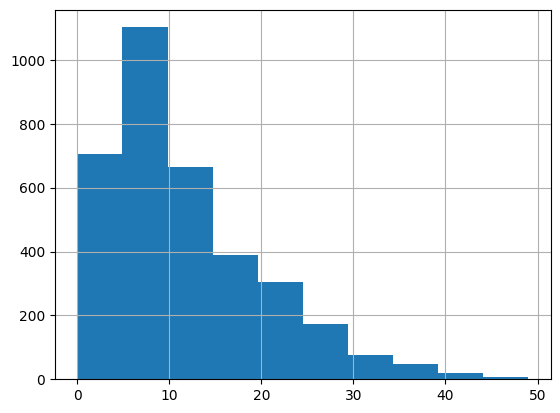

In [ ]:
df_train["Status_of_travel"].hist()

In [ ]:
# 意味合いに沿ってrank化
rank_dict = {
    'Large Business': 3,
    'Small Business': 2,
    'Salaried': 1,
}

# df_trainへの適用
df_train['Occupation_rank'] = df_train['Occupation'].map(rank_dict).astype(int)

# df_testへの適用
df_test['Occupation_rank'] = df_test['Occupation'].map(rank_dict).astype(int)

print(df_train["Occupation_rank"].value_counts())

Occupation_rank
2    1727
1    1401
3     361
Name: count, dtype: int64


In [ ]:
#職業ランク×都市ランク=収入が高い人は都市近郊（一つの経済指標）
df_train["JobCityRank"] = df_train["Occupation_rank"] * df_train["CityTier_reverse"]

# df_testへの適用
df_test["JobCityRank"] = df_test["Occupation_rank"] * df_test["CityTier_reverse"]


print(df_train["JobCityRank"].value_counts())

JobCityRank
2    859
4    842
6    780
3    636
9    210
1    162
Name: count, dtype: int64


In [ ]:
#Occupation_rankの各値に対するCityTier_reverseの出現回数を計算
citytier_reverse_counts = df_train.groupby("Occupation_rank")["CityTier_reverse"].value_counts().to_dict()

# 新しい特徴量を作成
df_train["City_freq_Occupation"] = df_train.apply(
    lambda row: citytier_reverse_counts.get((row["Occupation_rank"], row["CityTier_reverse"]), 0),
    axis=1,
)
df_test["City_freq_Occupation"] = df_test.apply(
    lambda row: citytier_reverse_counts.get((row["Occupation_rank"], row["CityTier_reverse"]), 0),
    axis=1,
)

print(df_train[["Occupation_rank", "CityTier_reverse", "City_freq_Occupation"]].head())


   Occupation_rank  CityTier_reverse  City_freq_Occupation
0                3                 2                   121
1                1                 3                   606
2                3                 3                   210
3                2                 2                   842
4                2                 1                   226


In [ ]:
#旅行を予定している人数が多いほど売り込み満足度のスコアが高いのでは
df_train["GroupTravel_Satisfaction"] = df_train["PitchSatisfactionScore"] * df_train["NumberOfPersonVisiting"]
df_train["GroupTravel_Satisfaction"] = df_train["GroupTravel_Satisfaction"].astype(int)

# df_testへの適用
df_test["GroupTravel_Satisfaction"] = df_test["PitchSatisfactionScore"] * df_test["NumberOfPersonVisiting"]
df_test["GroupTravel_Satisfaction"] = df_test["GroupTravel_Satisfaction"].astype(int)

print(df_train["GroupTravel_Satisfaction"].value_counts())

GroupTravel_Satisfaction
6     849
4     680
2     435
8     417
3     349
12    289
9     270
1      56
10     44
15     42
16     41
5      12
20      5
Name: count, dtype: int64


<Axes: >

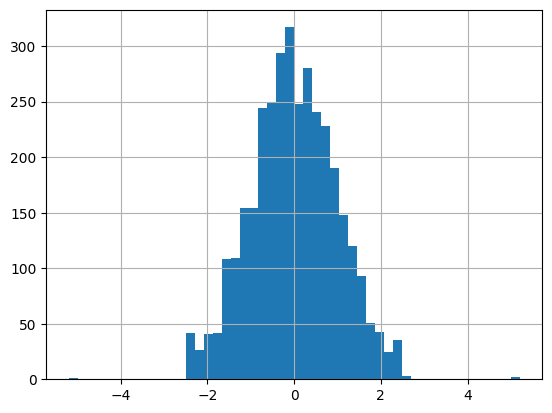

In [ ]:
from sklearn.preprocessing import QuantileTransformer

# RANKGAUSSオブジェクトの作成
qt = QuantileTransformer(n_quantiles=100, random_state=123, output_distribution='normal')

# df_trainへの適用
income_data_train = df_train[["MonthlyIncome_0_med"]]
qt.fit(income_data_train)  # df_trainのデータでfit
df_train["M_income_transformed"] = qt.transform(income_data_train)

# df_testへの適用
income_data_test = df_test[["MonthlyIncome_0_med"]]
df_test["M_income_transformed"] = qt.transform(income_data_test)  # df_testのデータを変換

df_train["M_income_transformed"].hist(bins=50)

<Axes: >

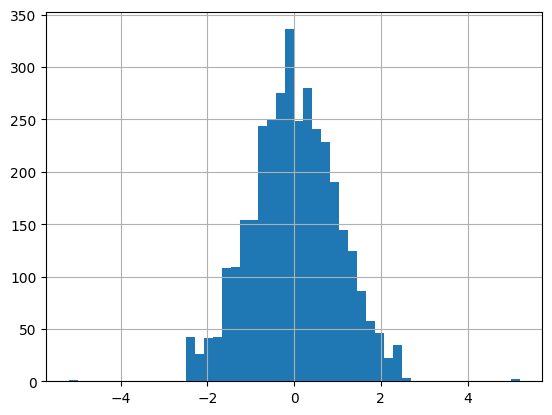

In [ ]:
# RANKGAUSSオブジェクトの作成
qt = QuantileTransformer(n_quantiles=100, random_state=123, output_distribution='normal')

# 年収でも作成しておく
income_data_train = df_train[["AnnualIncome_rounded"]]
qt.fit(income_data_train)  # df_trainのデータでfit
df_train["A_income_transformed"] = qt.transform(income_data_train)

# df_testへの適用
income_data_test = df_test[["AnnualIncome_rounded"]]
df_test["A_income_transformed"] = qt.transform(income_data_test)  # df_testのデータを変換

#
df_train["A_income_transformed"].hist(bins=50)

<Axes: >

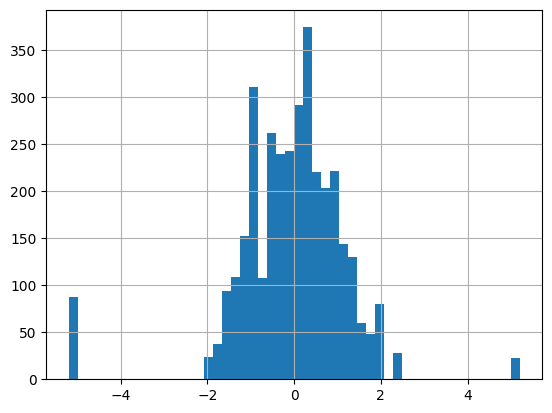

In [ ]:
# RANKGAUSSオブジェクトの作成
qt = QuantileTransformer(n_quantiles=100, random_state=123, output_distribution='normal')

# df_trainへの適用
income_data_train = df_train[["Age_numeric_0_med"]]
qt.fit(income_data_train)  # df_trainのデータでfit
df_train["Age_nume_transformed"] = qt.transform(income_data_train)

# df_testへの適用
income_data_test = df_test[["Age_numeric_0_med"]]
df_test["Age_nume_transformed"] = qt.transform(income_data_test)  # df_testのデータを変換

#
df_train["Age_nume_transformed"].hist(bins=50)

<Axes: >

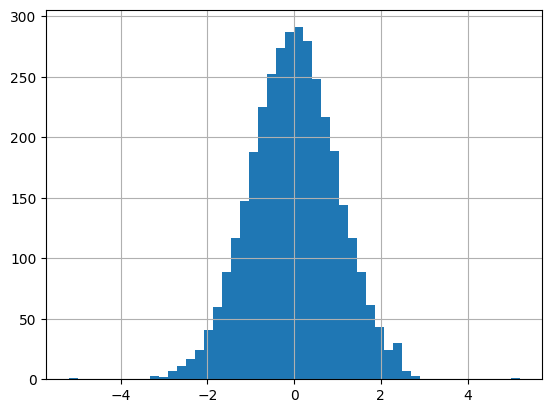

In [ ]:
# RANKGAUSSオブジェクトの作成
qt = QuantileTransformer(n_quantiles=100, random_state=123, output_distribution='normal')

# df_trainへの適用
income_data_train = df_train[["Age_Annual"]]
qt.fit(income_data_train)
df_train["Age_ann_transformed"] = qt.transform(income_data_train)

# df_testへの適用
income_data_test = df_test[["Age_Annual"]]
df_test["Age_ann_transformed"] = qt.transform(income_data_test)

#
df_train["Age_ann_transformed"].hist(bins=50)

<Axes: >

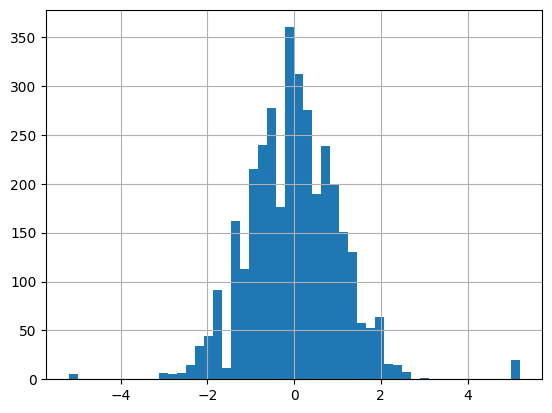

In [ ]:
# RANKGAUSSオブジェクトの作成
qt = QuantileTransformer(n_quantiles=100, random_state=123, output_distribution='normal')

# df_trainへの適用
income_data_train = df_train[["time_of_follow_new"]]
qt.fit(income_data_train)
df_train["time_of_transformed"] = qt.transform(income_data_train)

# df_testへの適用
income_data_test = df_test[["time_of_follow_new"]]
df_test["time_of_transformed"] = qt.transform(income_data_test)

#
df_train["time_of_transformed"].hist(bins=50)

In [ ]:
df_train["time_of_transformed"].describe()

,time_of_transformed
count,3489.000000
mean,0.009761
std,1.064442
min,-5.199338
25%,-0.666564
50%,-0.050661
75%,0.650837
max,5.199338


In [ ]:
# ホテルの評価*家族構成人数
df_train["family"] = df_train["family"].astype(int)
df_train["family_hotel_score"] = df_train["PreferredPropertyStar"] * df_train["family"]
df_train["family_hotel_score"] = df_train["family_hotel_score"].astype(int)

# df_testへの適用
df_test["family"] = df_test["family"].astype(int)
df_test["family_hotel_score"] = df_test["PreferredPropertyStar"] * df_test["family"]
df_test["family_hotel_score"] = df_test["family_hotel_score"].astype(int)

print(df_train["family_hotel_score"].value_counts())

family_hotel_score
6     782
9     736
12    566
8     389
3     374
4     291
16    125
15     92
10     64
20     41
5      25
25      4
Name: count, dtype: int64


In [ ]:
# 各年齢あたりの年収
df_train["Annual_Age"] = df_train["AnnualIncome_rounded"] / df_train["Age_numeric_0_med"].astype(int)

# df_testへの適用
df_test["Annual_Age"] = df_test["AnnualIncome_rounded"] / df_test["Age_numeric_0_med"].astype(int)


print(df_train["Annual_Age"].value_counts())

Annual_Age
12.000000    44
10.000000    21
8.000000     17
15.000000    17
9.000000     14
             ..
6.450980      1
12.722222     1
13.187500     1
9.122807      1
7.590909      1
Name: count, Length: 2328, dtype: int64


In [ ]:
# 各顧客ランクあたりの年収
df_train['income_Degi_rank'] = df_train['AnnualIncome_rounded'] / df_train['Designation_rank'].astype(int)

# df_testへの適用
df_test['income_Degi_rank'] = df_test['AnnualIncome_rounded'] / df_test['Designation_rank'].astype(int)

#
print(df_train['income_Degi_rank'].value_counts())

income_Degi_rank
120.000000    113
360.000000     81
240.000000     72
104.000000     46
137.333333     37
             ... 
144.500000      1
127.750000      1
159.666667      1
157.333333      1
158.500000      1
Name: count, Length: 708, dtype: int64


In [ ]:
# 年収/顧客への売り込み時間
df_train['Anual_div_pitch_time'] = df_train['AnnualIncome_rounded'] / df_train['Pitch_minutes_0_med'].replace(0, 1)

# df_testへの適用
df_test['Anual_div_pitch_time'] = df_test['AnnualIncome_rounded'] / df_test['Pitch_minutes_0_med'].replace(0, 1)

#
print(df_train['Anual_div_pitch_time'].value_counts())

Anual_div_pitch_time
40.000000    36
30.000000    27
32.000000    24
36.000000    21
45.000000    20
             ..
37.833333     1
19.833333     1
19.285714     1
22.222222     1
37.111111     1
Name: count, Length: 1928, dtype: int64


<Axes: >

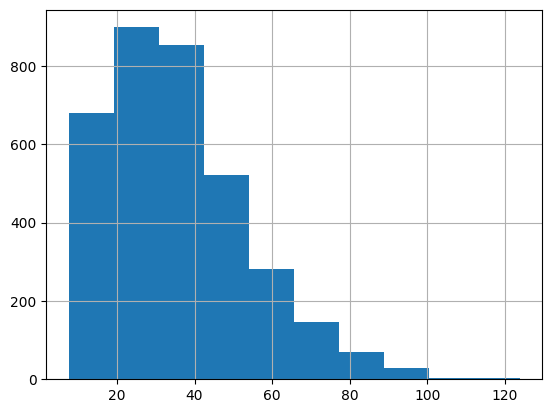

In [ ]:
df_train['Anual_div_pitch_time'].hist()

In [ ]:
# 総合的な営業力
df_train["total_pitch_point"] = df_train["NumberOfFollowups_max"] * (df_train["PitchSatisfactionScore"] + df_train["ProductPitched_Score"] + df_train["Pitch_minutes_0_med"])

# df_testへの適用
df_test["total_pitch_point"] = df_test["NumberOfFollowups_max"] * (df_test["PitchSatisfactionScore"] + df_test["ProductPitched_Score"] + df_test["Pitch_minutes_0_med"])

#
print(df_train["total_pitch_point"].value_counts())

total_pitch_point
60.0     221
48.0     169
80.0     141
72.0     132
56.0     126
        ... 
186.0      1
216.0      1
174.0      1
82.0       1
23.0       1
Name: count, Length: 123, dtype: int64


<Axes: >

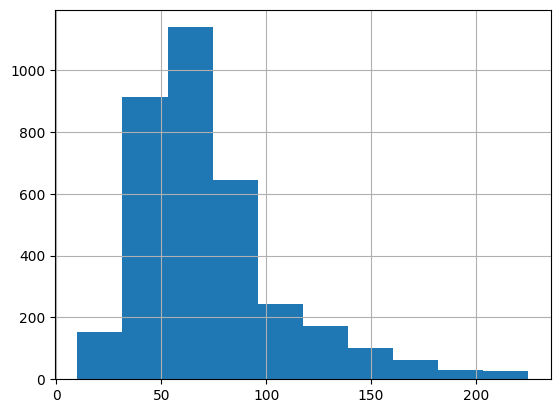

In [ ]:
df_train["total_pitch_point"].hist()

<Axes: >

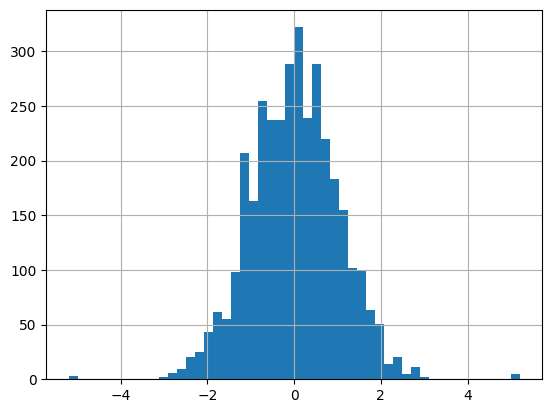

In [ ]:
# RANKGAUSSオブジェクトの作成
qt = QuantileTransformer(n_quantiles=100, random_state=123, output_distribution='normal')

# df_trainへの適用
income_data_train = df_train[["total_pitch_point"]]
qt.fit(income_data_train)  # df_trainのデータでfit
df_train["total_pitch_transformed"] = qt.transform(income_data_train)

# df_testへの適用
income_data_test = df_test[["total_pitch_point"]]
df_test["total_pitch_transformed"] = qt.transform(income_data_test)  # df_testのデータを変換

#
df_train["total_pitch_transformed"].hist(bins=50)

In [ ]:
# 売り込み満足度*顧客ランク=満足度と顧客ランクが高いほど成約率も高いのでは
df_train["RankSatisfaction"] = df_train["PitchSatisfactionScore"] * df_train["Designation_rank"].astype(int)

# df_testへの適用
df_test["RankSatisfaction"] = df_test["PitchSatisfactionScore"] * df_test["Designation_rank"].astype(int)

#
print(df_train["RankSatisfaction"].value_counts())

RankSatisfaction
4     664
2     632
6     580
12    362
3     351
8     275
9     263
1     189
16     70
20     33
10     26
15     23
5      21
Name: count, dtype: int64


In [ ]:
# 売り込み満足度*年収=高い数値になほど成約しやすいのでは
df_train["Annual_satis_score"] = df_train["PitchSatisfactionScore"] * df_train["AnnualIncome_rounded"]

# df_testへの適用
df_test["Annual_satis_score"] = df_test["PitchSatisfactionScore"] * df_test["AnnualIncome_rounded"]

#
print(df_train["Annual_satis_score"].value_counts())

Annual_satis_score
1440    81
720     69
960     44
1080    42
1648    38
        ..
353      1
1340     1
330      1
1707     1
334      1
Name: count, Length: 920, dtype: int64


<Axes: >

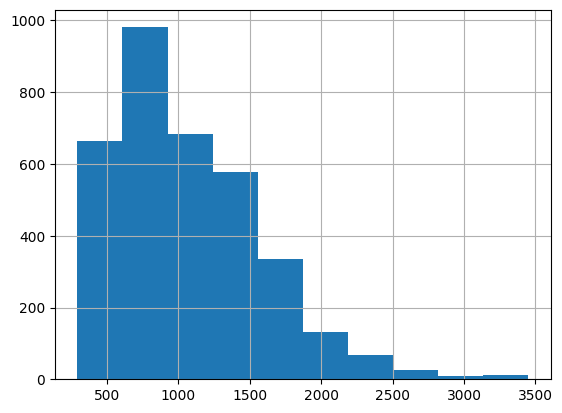

In [ ]:
df_train["Annual_satis_score"].hist()

<Axes: >

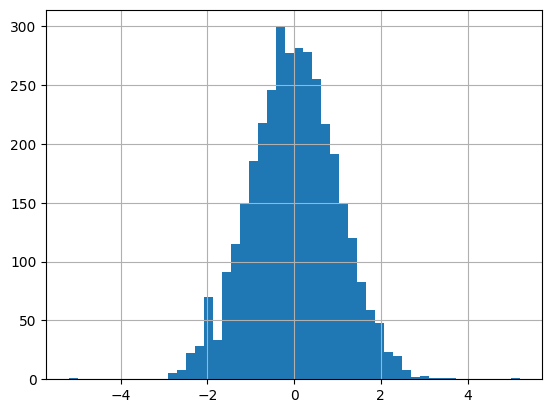

In [ ]:
# RANKGAUSSオブジェクトの作成
qt = QuantileTransformer(n_quantiles=100, random_state=123, output_distribution='normal')

# df_trainへの適用
income_data_train = df_train[["Annual_satis_score"]]
qt.fit(income_data_train)  # df_trainのデータでfit
df_train["Annual_satis_transformed"] = qt.transform(income_data_train)

# df_testへの適用
income_data_test = df_test[["Annual_satis_score"]]
df_test["Annual_satis_transformed"] = qt.transform(income_data_test)  # df_testのデータを変換

#
df_train["Annual_satis_transformed"].hist(bins=50)

In [ ]:
df_train["Age_numeric_0_med"].describe()

,Age_numeric_0_med
count,3489.000000
mean,38.715391
std,9.818951
min,20.000000
25%,31.000000
50%,38.000000
75%,46.000000
max,60.000000


In [ ]:
df_train.isnull().sum()

,0
id,0
Age,0
TypeofContact,6
CityTier,0
DurationOfPitch,0
...,...
total_pitch_point,0
total_pitch_transformed,0
RankSatisfaction,0
Annual_satis_score,0


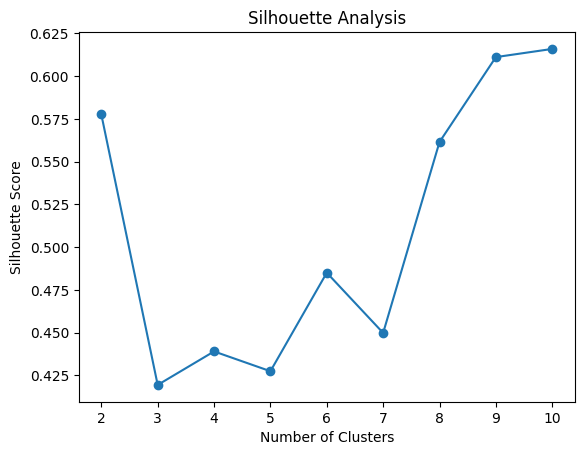

In [ ]:
#クラスタリングできそうな関係性を見つける
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# クラスタ数を変化させながら、シルエット係数を計算し確認
silhouette_scores = []
for i in range(2, 11): # クラスタ数は2以上でないと計算できない
    kmeans = KMeans(n_clusters=i, random_state=123)
    labels = kmeans.fit_predict(df_train[[
       "PitchSatisfactionScore",
            "ProductPitched_Score","Passport", "RankSatisfaction",]])
    silhouette_scores.append(silhouette_score(df_train[["PitchSatisfactionScore",
            "ProductPitched_Score","Passport", "RankSatisfaction",]], labels))

# シルエット係数をグラフ化
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()

In [ ]:
# クラスタリングに用いる特徴量を選択
features = ["PitchSatisfactionScore",
            "ProductPitched_Score","Passport", "RankSatisfaction"]

# 特徴量を標準化
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_train[features])

# KMeansでクラスタリング (クラスタ数を5に設定)
kmeans = KMeans(n_clusters=10, random_state=123)
df_train['cluster_test'] = kmeans.fit_predict(scaled_features)

# シルエット係数を計算
silhouette_avg = silhouette_score(scaled_features, df_train['cluster_test'])
print(f"Silhouette Score: {silhouette_avg}")

# クラスタごとの特徴量の平均値を表示
cluster_means = df_train.groupby('cluster_test')[features].mean()
print(cluster_means)

# テストデータにも同様の処理を適用
scaled_features_test = scaler.transform(df_test[features]) # fit_transform ではなく transform を使用
df_test['cluster_test'] = kmeans.predict(scaled_features_test)

Silhouette Score: 0.5658212555058868
              PitchSatisfactionScore  ProductPitched_Score  Passport  \
cluster_test                                                           
0                           2.345088              2.000000  0.000000   
1                           3.718894              1.213518  0.000000   
2                           2.324324              3.378378  1.000000   
3                           1.000000              1.603448  0.000000   
4                           2.237885              4.286344  0.000000   
5                           3.649289              3.011848  0.000000   
6                           2.422414              1.452586  1.000000   
7                           4.333333              4.428571  0.142857   
8                           2.008000              1.000000  0.000000   
9                           1.602254              3.133655  0.000000   

              RankSatisfaction  
cluster_test                    
0                     4.715365  

In [ ]:
df_train['cluster_test'].value_counts()

,count
cluster_test,
1,651
9,621
5,422
0,397
8,375
3,348
6,232
4,227
2,111


In [ ]:
#ここまで特徴量作成
df_train2 = df_train.copy()#lgbm用にコピー
df_test2 = df_test.copy()#lgbm用にコピー